This is the Jupyter notebook containing codes from the Gaze accuracy metrics folder of the GazeVisual-Lib repository.

This program data_statistics.py calculates mean, standard and median absolute deviation, 95% confidence intervals and Zscore from the input gaze csv file. It also plots the 1-D Kernel density estimate of gaze error values .For implementation,  the CSV file named user_data_proc.csv is used

Mean error 0.721441664036813
95% Confidence Interval (0.6772494286361521, 0.7656338994374732)
Interquartile range 0.6289083944250002
Standard deviation 1.1288562801740334
Median_absolute_deviation 0.278665007499999


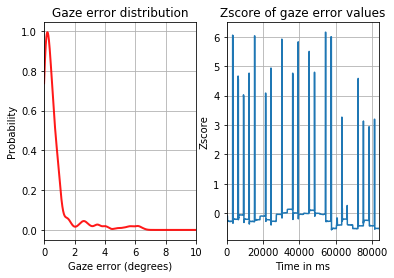

In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import stats
from scipy import signal
import statsmodels.stats.api as sms
from sklearn.neighbors import KernelDensity


tim_rel=[]
gaze_gt=[]
gaze_ang=[]

with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Gaze accuracy metrics/user_data_proc.csv','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        tim_rel.append(float(r1[0]))
        gaze_ang.append(float(r1[14]))   #Load gaze angle data
        gaze_gt.append(float(r1[13]))  #Load gaze ground truth angle
        
############ Estimate gaze error ####################
gz_filt= signal.medfilt(gaze_ang,41) ## Do median filtering to remove outliers
gz_err= [abs(m3-n3) for m3,n3 in zip(gz_filt,gaze_gt)]

################ Statistics calculations
##Mean
avg= np.mean(gz_err)
##95% confidence interval
conf= sms.DescrStatsW(gz_err).tconfint_mean(alpha=0.05)
### Interquartile range ###
qu4, ql4= np.percentile(gz_err, [75 ,25])
IQR= qu4-ql4
#Standard deviation
sd= np.std(gz_err)
#Median absolute deviation
ys= gz_err
median_y = np.median(ys)
median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#Zscore
zs= stats.zscore(gaze_ang)
### 1D KDE of gaze errors
xfit = np.linspace(0, 10, 1000) 
x1= np.array(gz_err)
X1 = x1[:, np.newaxis]
Xfit = xfit[:, np.newaxis]
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X1) 
density1 = np.exp(kde1.score_samples(Xfit))

###################### Print values ###########################################

print "Mean error", avg
print "95% Confidence Interval", conf
print "Interquartile range", IQR
print "Standard deviation", sd
print "Median_absolute_deviation", median_absolute_deviation_y
###################### Plots ##################################################
fig1 = plt.figure(1)
plt.subplot(1, 2, 1) 
plt.title('Gaze error distribution')
plt.xlabel('Gaze error (degrees)')
plt.ylabel('Probability')
plt.xlim(0,10)
plt.plot(xfit, density1, color='r', alpha=0.9, linewidth=2)
plt.grid()

plt.subplot(1, 2, 2) 
plt.title('Zscore of gaze error values')
plt.xlabel('Time in ms')
plt.ylabel('Zscore')
plt.xlim(0,max(tim_rel))
plt.plot(tim_rel,zs)
plt.grid()


This program data_similarity.py calculates similarity between data from different gaze datasets. The similarity calculation is based on correlation, intersection and Bhattacharya distance computed on histograms of two gaze datasets. For implementation, the CSV file named user_data_proc.csv is used Opencv 2 for Python is needed for implemenetation of this code


In [ ]:
############################################# 
import matplotlib.pyplot as plt
import csv
import numpy as np
import cv2
from scipy import signal



gaze_ang=[]
yaw_ang=[]
with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Gaze accuracy metrics/user_data_proc.csv','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        gaze_ang.append(float(r1[14]))  #Load gaze angle data
        yaw_ang.append(float(r1[10]))   #Load yaw angle data
        

####################### Filter values ##############################
gaze_ang= signal.medfilt(gaze_ang,41) 
yaw_ang= signal.medfilt(yaw_ang,41) 

####################### Plot histograms ############################
f1 = plt.figure(1)
bins = np.linspace(0, 10, 40)  #=[0, 1, 2, 3, 4, 5, 10]
plt.hist(gaze_ang, bins=10, label='gaze_angle', color='r')  #histogram of errors at dist= 45
plt.hist(yaw_ang, bins, label='yaw_angle', color='b')
plt.legend()
plt.grid(True)
plt.show()

##################### Estimate similarity measures from histograms ############
hist1, bins= np.histogram(gaze_ang, bins, normed=1,weights=None )#, color='r', alpha=0.4, label='45 cm')
hist2, bins= np.histogram(yaw_ang, bins, normed=1,weights=None)#, color='g', alpha=0.4, label='60 cm')

h1= np.float32(hist1)
h2= np.float32(hist2)

com1 = cv2.compareHist(h1,h1,cv2.cv.CV_COMP_INTERSECT ) ###Histogram intersection
com2 = cv2.compareHist(h2,h1,cv2.cv.CV_COMP_CORREL)     ###Histogram correlation
com3 = cv2.compareHist(h2,h1,cv2.cv.CV_COMP_BHATTACHARYYA) ##Bhattacharya distance
com4 =  cv2.compareHist(h2,h1,cv2.cv.CV_COMP_CHISQR)

print "Similarity results", com1, com2, com3, com4

This program scatter_density.py plots the scatter density of gaze data over the display area. For implementation the CSV file named user_data_proc.csv is used

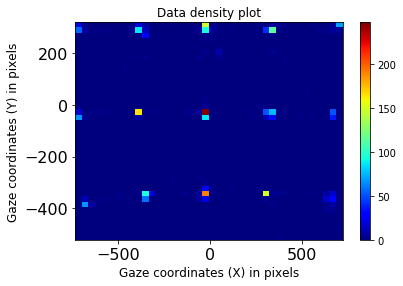

In [6]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy.stats import gaussian_kde


x=[]
y=[]
with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Gaze accuracy metrics/user_data_proc.csv','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        
        x.append(float(r1[3]))
        y.append(float(r1[4]))

################# Plotting ####################################################
g6 = plt.figure(1)
ax6 = g6.add_subplot(111)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


plt.hist2d(x, y, (40, 40), cmap=plt.cm.jet)
plt.colorbar()
plt.tick_params(labelsize=10)
plt.title("Data density plot")
plt.xlabel('Gaze coordinates (X) in pixels',fontsize=12)
plt.ylabel('Gaze coordinates (Y) in pixels',fontsize=12)
plt.tick_params(labelsize=16)
plt.show()